In [1]:
%matplotlib notebook

import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

api_key = 'kgMN5tuNUwb7-F29s6xp' 

<IPython.core.display.Javascript object>


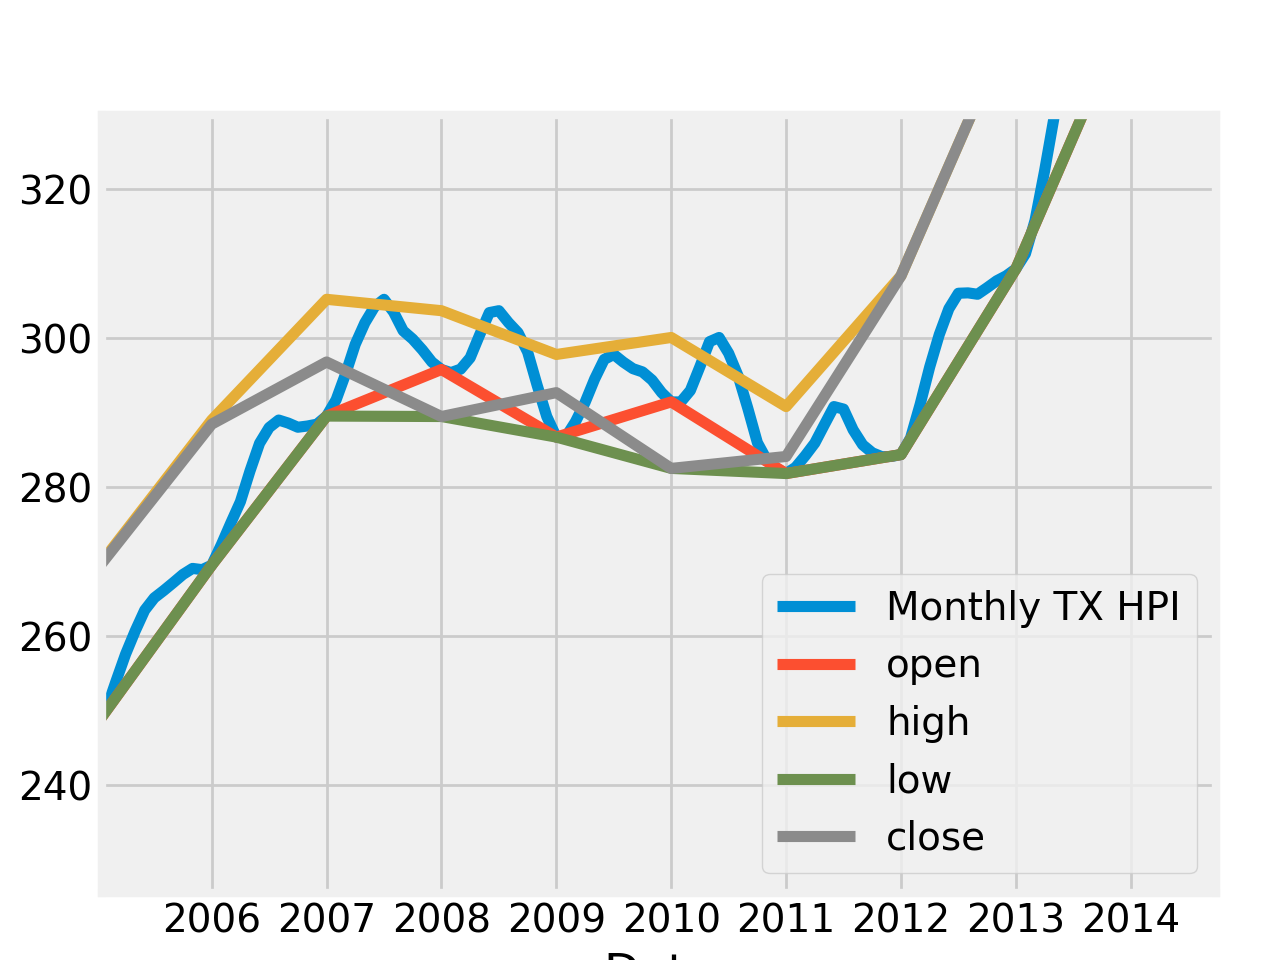

                 open       high        low      close
Date                                                  
1975-12-31   0.000000   6.135463   0.000000   5.999052
1976-12-31   6.397316  14.353186   6.397316  14.353186
1977-12-31  14.876065  29.386886  14.876065  29.386886
1978-12-31  30.746689  49.589921  30.746689  49.589921
1979-12-31  50.991530  74.564026  50.991530  74.564026


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()


In [7]:
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states') # head html into a list of dataframes
    return fiddy_states[0][0][1:]


def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()

    for abbv in states:
        query = "FMAC/HPI_"+str(abbv)
        df1 = quandl.get(query, authtoken=api_key)
        
        df1=df1.rename(columns = {'Value': abbv}) #Change Value to State Abbrev
        df1=df1.rename(columns = {'?Date': 'Date'}) # fix a space in front of Date

        #df = df.pct_change() # change data to percent change
        df[abbv] = (df1 - df1.iloc[0]) / df1.iloc[0] * 100 # make it so the numbs start at 0 (New - Old) / old * 100
        #print(df[abbv].head())

        if main_df.empty:
            main_df = df[abbv] # first run make main_df equal to df
        else:
            main_df[abbv] = df[abbv] # add column to main_df

    #print(main_df.head())

#IF YOU USE THIS YOU HAVE TO 'IMPORT PICKLE' AT THE TOP...A FASTER VERSION IS BELOW
    pickle_out = open('fiddy_states3.pickle','wb') # how you setup pickle
    pickle.dump(main_df, pickle_out) # how you save the pickle
    pickle_out.close()
    
    
def HPI_Benchmark():
    df = quandl.get('FMAC/HPI_USA', authtoken=api_key)
    df=df.rename(columns = {'Value': 'United States'}) #Change Value to State Abbrev
    df=df.rename(columns = {'?Date': 'Date'}) # fix a space in front of Date
    df = (df["United States"] - df["United States"][0]) / df["United States"][0] * 100.0
    return df
    
    
#grab_initial_state_data() # uncomment to get data again...make sure you change the *.pickle above to the new save location

#print(HPI_data.head())

fig = plt.figure() #
ax1 = plt.subplot2grid((1,1),(0,0)) # is a 1x1 grid of subplots and 0,0 is where it starts

HPI_data = pd.read_pickle('fiddy_states3.pickle') #####faster version of pickle

TX1yr = HPI_data['TX'].resample('A', how='ohlc') # resample annually with mean, ohlc (open high low close)
print(TX1yr.head())

HPI_data['TX'].plot(ax = ax1, label='Monthly TX HPI') # create plot
TX1yr.plot(ax = ax1)

plt.legend() # plot legend
plt.show() # show plot


    

In [ ]:
## Start of 